In [213]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

/home/igor/houseprice_prediction/venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


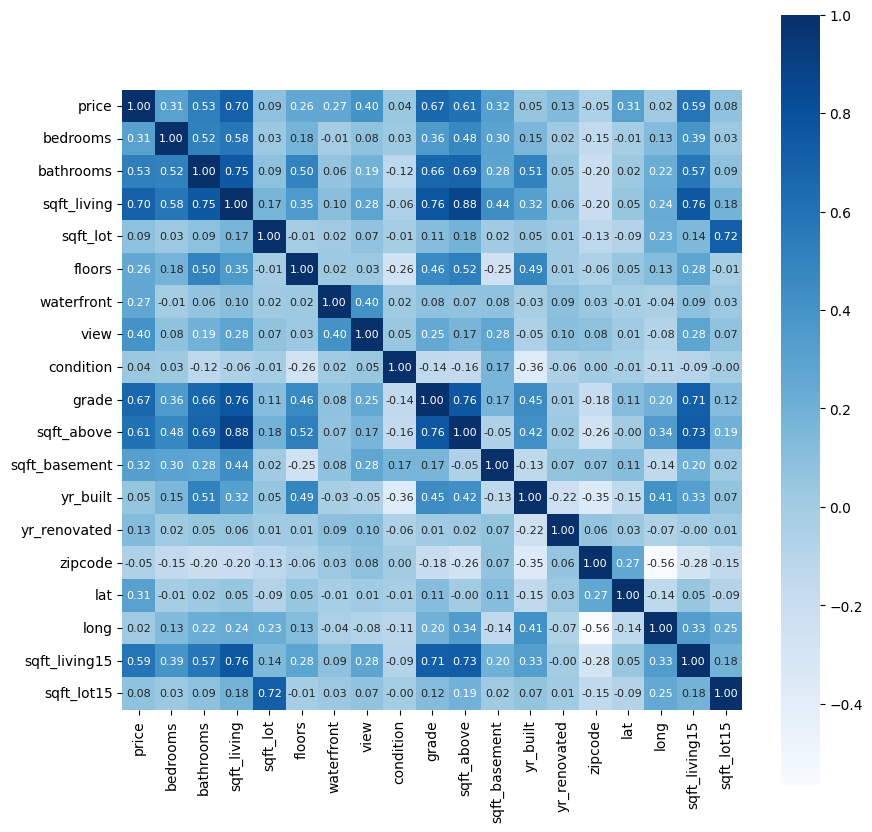

In [214]:
df = pd.read_csv("./kc_house_data.csv")
df = df.drop(columns=["date", "id"])

# Cálculo do VIF para detectar colinearidade entre variáveis
vif = pd.DataFrame()
vif["features"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

y = df["price"]
xs = df[["sqft_living", "view", "lat"]]

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cbar= True, square=True, annot=True, cmap='Blues', fmt=".2f", annot_kws={'size': 8})
plt.show()


In [215]:
# Treino do modelo sem colinearidades significativas
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

R-squared train: 0.61
R-squared test: 0.60


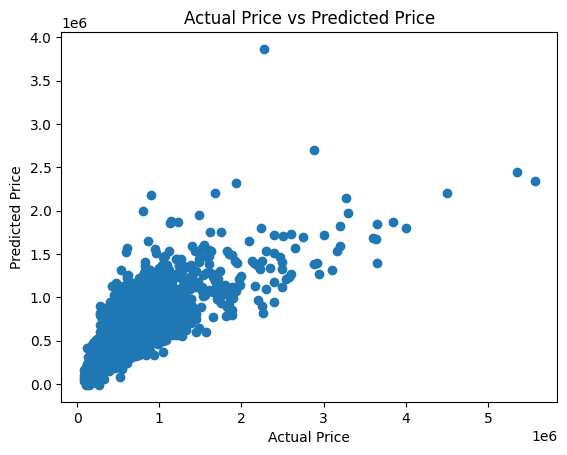

In [216]:
# Avaliação 
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"R-squared train: {r2_train:.2f}")
print(f"R-squared test: {r2:.2f}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [217]:
# Treino do modelo ignorando colinearidades
xs = df.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

R-squared train: 0.70
R-squared test: 0.70


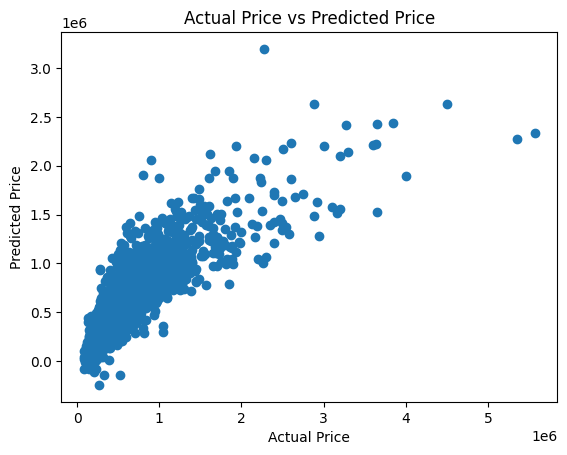

In [218]:
# Avaliação
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"R-squared train: {r2_train:.2f}")
print(f"R-squared test: {r2:.2f}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()